referência: https://www.kaggle.com/nisasoylu/machine-learning-implementation-on-cancer-dataset 

Analisando dados para previsão de cancer de mama

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [6]:
data = pd.read_csv('B_cancer.csv', sep = ',')

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

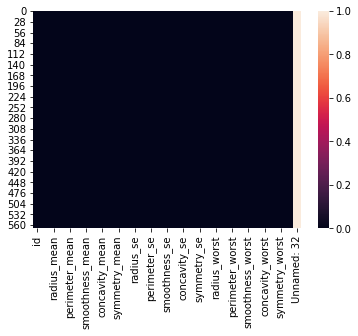

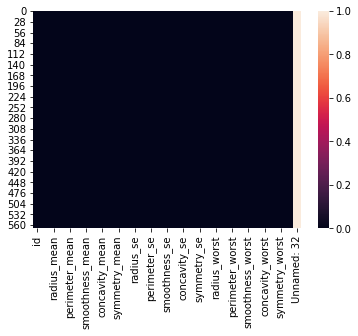

(id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se            0
 symmetry_se                  0
 fractal_dimension_se         0
 radius_worst                 0
 texture_worst                0
 perimeter_worst              0
 area_worst                   0
 smoothness_worst             0
 compactness_worst            0
 concavity_worst              0
 concave points_worst         0
 symmetry_worst               0
 fractal

In [9]:
sns.heatmap(data.isnull())
plt.show()
sns.heatmap(data.isna())
plt.show()
data.isnull().sum(),data.isna().sum()

In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

vamos retirar as colunas 'id' e Unnamed: 32 da nossa tabela de dados.

In [12]:
data.drop(['id','Unnamed: 32'], axis = 1,inplace = True)

In [13]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Vamos verificar se temos dados categóricos.

In [14]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['diagnosis']


Vamos alocar o valor 1 para tumor M e 0 para B

In [17]:
data['diagnosis'] = data['diagnosis'].map(lambda x : 1 if x == 'M' else 0)
#data.diagnosis = [1 if i == "M" else 0 for i in dataset.diagnosis]


In [20]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

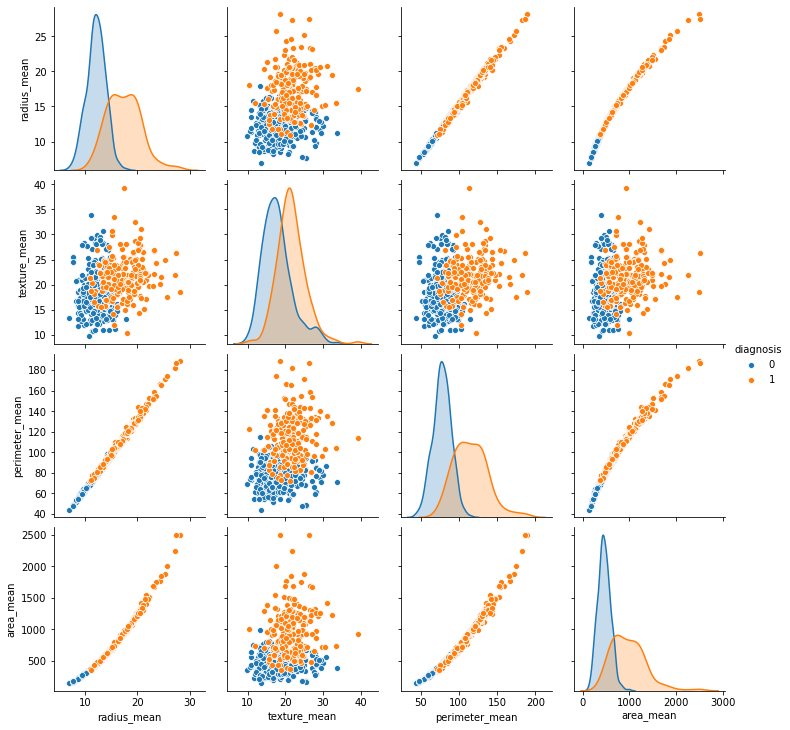

In [116]:
sns.pairplot(data.loc[:,'diagnosis':'area_mean'], hue="diagnosis");


Já trminamos com a parte de análise exploratória. Vamos implementar nosso modelo. O escolhido foi regressão logística.
Usaremos a biblíoteca do Scikit-learn

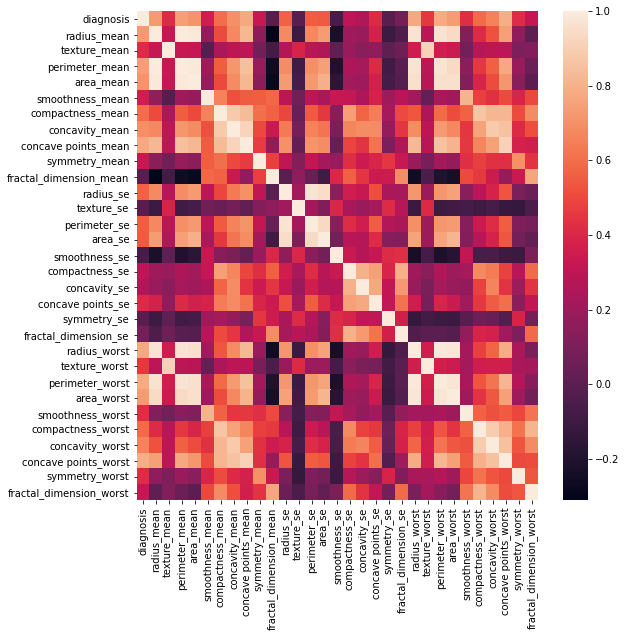

In [22]:
plt.figure(figsize = (9,9))
sns.heatmap(data.corr(),annot = False, fmt = '.0%')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [55]:
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

In [46]:
y.shape,X.shape

((569,), (569, 30))

Antes de fitarmos nosso modelo, vamos normalizar os dados.

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [57]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = .30)

In [58]:
lr = LogisticRegression()
lr.max_iter = 3000
lr.fit(X_train, y_train)
print("Test accuracy: ", lr.score(X_test, y_test))


Test accuracy:  0.9590643274853801
